Juan Jacobo González Herrera (1006228229)

Referencias: 
["Bifurcation Analysis of Five-Phase Induction Motor Drives With Third Harmonic Injection"](https://ieeexplore.ieee.org/abstract/document/4454355?casa_token=_MWex0jc8oQAAAAA:CaJ01fGqs26lueY6RSOHW70q_e8wSjluuMXYws9GWyUJbnNMo0ehdUzos3uxNP7urmWonbA2MLg) (PRINCIPAL)

["Five-Phase Induction Motor Drives With DSP-Based Control System"](https://ieeexplore.ieee.org/abstract/document/1016801?casa_token=UxazIDRdYvkAAAAA:3CWFo-QXObmhAQ-PKQFxh4omSzscxjedTooEHAcuwfP3NoUKMmywudwmQ-TCnuKQmhpHX9ual1w) 

["Rotor Field Oriented Control of Five-Phase Induction Motor with the Combined Fundamental and Third Harmonic Currents"](https://ieeexplore.ieee.org/abstract/document/911677?casa_token=gEw8IL27RoQAAAAA:T8hKTx6TlDxG76g__plDk-F3JZPZMAJT-FMcSMl0T8c283B9pUdySjmH_WFXck2qyYUvDAzeDnQ
)

http://article.sapub.org/10.5923.j.eee.20120202.03.html



In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from sympy import cosh
from sympy import sinh
import pandas as pd
from scipy import integrate
import ipywidgets as ipw
from pylab import *
from scipy.integrate import odeint
from matplotlib import pyplot 
from scipy.integrate import solve_ivp #Solo para comprobar que el método Euler funciona (deben ser iguales)
%matplotlib inline

In [2]:
#DEFINICIÓN METODO EULER
def Euler(func, X0, t):
    """
    Euler solver.
    """
    dt = t[1] - t[0]
    nt = len(t)
    X  = np.zeros([nt, len(X0)])
    X[0] = X0
    x1,x2,x3,x4,x5,x6 = X0
    for i in range(nt-1):
        X[i+1] = X[i] + func(X[i], t[i]) * dt
    return X

#Definición de constantes y variables

In [3]:
#Constantes
Lm1 = 0.47    #Inductancia magnetizante 1
Lm3 = 0.16    #Inductancia magnetizante 3
Lm = 0.47     #Inductancia magnetizante
Rs = 4.5      #Resistencia estator
Rr = 3.5      #Resistencia rotor
L1s = 0.03    #Inductancia 1 estator
L1r = 0.03    #Inductancia 1 rotor
u2 = 3        #Valor de referencia para la entrada de corriente directa
J = 0.05      #Coeficiente de inercia
a = 0.02      #Ángulo espacial entre dos devanados del estator (alpha)
wr = 50       #Velocidad angular del rotor de referencia

P = 4         #Número de polos pares
B = 0.004     #Coeficiente de fricción

In [4]:
#Variables (ESTA PORCIÓN DE CÓDIGO AÚN NO ESTÁ LISTA)

#Proporción del tercer armónico al componente fundamental
#Nk3 = 5 #Numero de muestras
#k3max = 0.6 # k3 final
#k3 = np.linspace(0.1,k3max, Nk3)

#Torque de carga
#NTL = 100000 #Numero de muestras
#TLmax = 70 # TL final
#TL = np.linspace(10,TLmax, NTL)

#Proporción real a estimada de la constante de tiempo del rotor
#Nk = 10000 #Numero de muestras
#kmax = 8 # k final
#k = np.linspace(0.1,kmax, Nk)

In [5]:
#Variables
TL = 40 
k3 = 0.3
k = 5

In [6]:
Tr1e = L1r/Rr  #Constante de tiempo del rotor estimada
Tr1 = k*Tr1e   #Constante de tiempo del rotor real

Tr3e = 0.5     #Constante de tiempo del rotor estimado tercer armónico
Tr3 = k3*Tr3e  #Constante de tiempo del rotor real tercer armónico

In [7]:
#Coeficientes
c1 = 1/Tr1
c2 = Lm1/Tr1
c3 = P*B/J
c4 = P/J
c5 = P*Lm1/L1r
c6 = 1/Tr3
c7 = Lm3/Tr3
c8 = P*Lm3/Tr3

In [8]:
kp = 1        #Coeficiente proporcional del controlador PI
ki = 500      #Coeficiente integral del controlador PI
kc = ki-kp*c3

#Método Solve_ivp

In [9]:
t_in=0
t_fin=0.8
xall0 = [1, 1, 1, 1, 1, 1]
tspam = [t_in,t_fin]
t=np.linspace(t_in,t_fin,100000)

def fun (t,xall):
  x1,x2,x3,x4,x5,x6 = xall
  return [-c1*x1+c2*x6-(k*c1/u2)*x6*x2,  -c1*x2+c2*u2+(k*c1/u2)*x6*x1,  -c6*x3+k3*c7*x6-3*(k*c1/u2)*x6*x4,  -c6*x4+k3*c7*u2+3*(k*c1/u2)*x6*x3,  -c3*x5-c4*(c5*(x2*x6-x1*u2)-TL-c3*wr/c4)-3*k3*c4*c8*(x4*x6-x3*u2),  kc*x5-kp*c4*(c5*(x2*x6-x1*u2)-TL-c3*wr/c4)-3*k3*kp*c4*c8*(x4*x6-x3*u2)]


sol = solve_ivp(fun, tspam, xall0, t_eval=t)


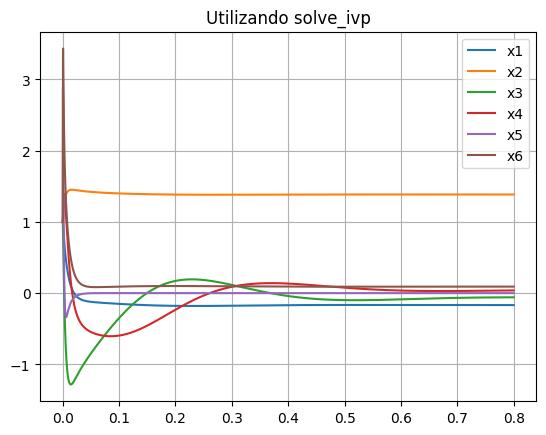

In [10]:
plt.plot(sol.t, sol.y[0],label='x1')
plt.plot(sol.t, sol.y[1],label='x2')
plt.plot(sol.t, sol.y[2],label='x3')
plt.plot(sol.t, sol.y[3],label='x4')
plt.plot(sol.t, sol.y[4],label='x5')
plt.plot(sol.t, sol.y[5],label='x6')
plt.title("Utilizando solve_ivp")
plt.legend()


plt.grid()

#Método euler

In [11]:
xall0 = [1, 1, 1, 1, 1, 1]
def derivative(Xall, t):
    x1,x2,x3,x4,x5,x6 = Xall
    X1 = -c1*x1+c2*x6-(k*c1/u2)*x6*x2
    X2 = -c1*x2+c2*u2+(k*c1/u2)*x6*x1
    X3 = -c6*x3+k3*c7*x6-3*(k*c1/u2)*x6*x4
    X4 = -c6*x4+k3*c7*u2+3*(k*c1/u2)*x6*x3
    X5 = -c3*x5-c4*(c5*(x2*x6-x1*u2)-TL-c3*wr/c4)-3*k3*c4*c8*(x4*x6-x3*u2)
    X6 = kc*x5-kp*c4*(c5*(x2*x6-x1*u2)-TL-c3*wr/c4)-3*k3*kp*c4*c8*(x4*x6-x3*u2)
    return np.array([X1,X2,X3,X4,X5,X6])

In [12]:
Nt = 100000 #Numero de muestras
tmax = 1 # Tiempo final
t = np.linspace(0.,tmax, Nt)

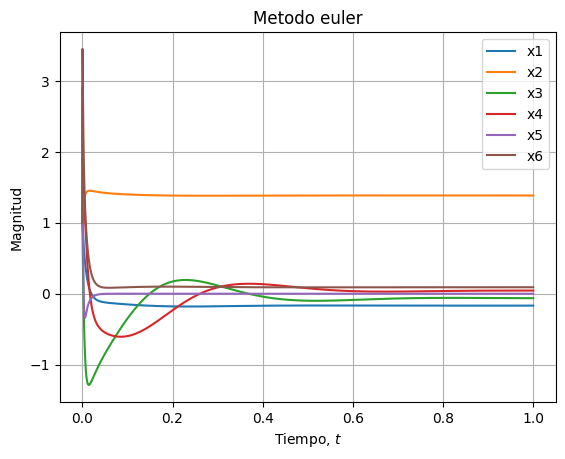

In [13]:
Xe = Euler(derivative, xall0, t)
plt.figure()
plt.title("Metodo euler")
plt.plot(t, Xe[:, 0], label = 'x1')
plt.plot(t, Xe[:, 1], label = "x2")
plt.plot(t, Xe[:, 2], label = "x3")
plt.plot(t, Xe[:, 3], label = "x4")
plt.plot(t, Xe[:, 4], label = "x5")
plt.plot(t, Xe[:, 5], label = "x6")
plt.grid()
plt.xlabel("Tiempo, $t$")
plt.ylabel('Magnitud')
plt.legend(loc = "best")

plt.show()

#Retrato de fase

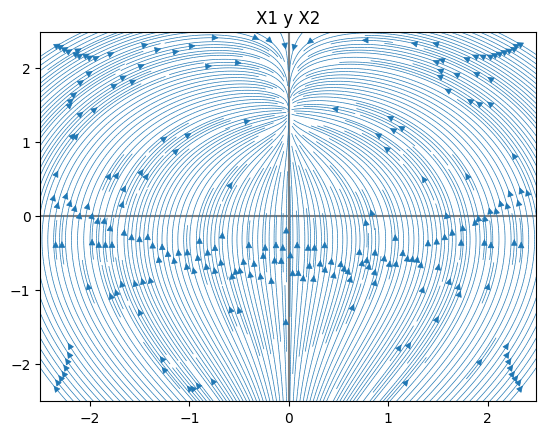

In [14]:
x1 = arange(-2.5, 2.5, 0.01)
x2 = arange(-2.5, 2.5, 0.01)
x6 = arange(-2.5, 2.5, 0.01)

#Retrato de fase X1 Y X2
x1,x2 = meshgrid(x1,x2)

X1 = -c1*x1+c2*x6-(k*c1/u2)*x6*x2
X2 = -c1*x2+c2*u2+(k*c1/u2)*x6*x1

plt.axhline(y=0, color='grey', linestyle='-')
plt.axvline(x=0, color='grey', linestyle='-')
plt.title("X1 y X2")
streamplot(x1,x2, X1, X2, density=5, linewidth=0.5)

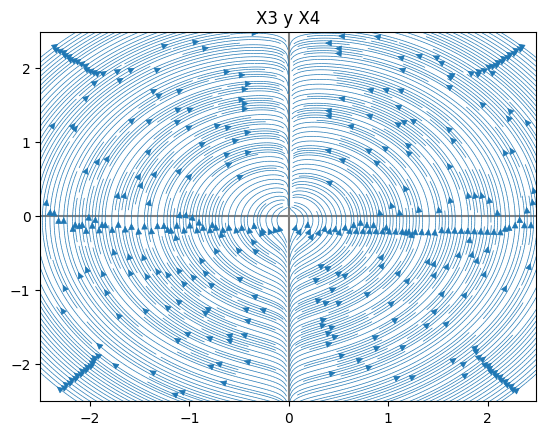

In [15]:
x3 = arange(-2.5, 2.5, 0.01)
x4 = arange(-2.5, 2.5, 0.01)
x6 = arange(-2.5, 2.5, 0.01)
#Retrato de fase X3 Y X4
x3,x4 = meshgrid(x3,x4)

X3 = -c6*x3+k3*c7*x6-3*(k*c1/u2)*x6*x4
X4 = -c6*x4+k3*c7*u2+3*(k*c1/u2)*x6*x3

plt.axhline(y=0, color='grey', linestyle='-')
plt.axvline(x=0, color='grey', linestyle='-')
plt.title("X3 y X4")
streamplot(x3,x4, X3, X4, density=5, linewidth=0.5)

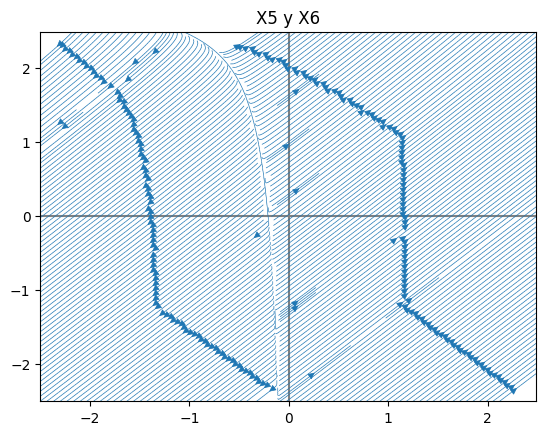

In [16]:
x1 = arange(-2.5, 2.5, 0.01)
x2 = arange(-2.5, 2.5, 0.01)
x3 = arange(-2.5, 2.5, 0.01)
x4 = arange(-2.5, 2.5, 0.01)
x5 = arange(-2.5, 2.5, 0.01)
x6 = arange(-2.5, 2.5, 0.01)

#Retrato de fase X5 Y X6
x5,x6 = meshgrid(x5,x6)

X5 = -c3*x5-c4*(c5*(x2*x6-x1*u2)-TL-c3*wr/c4)-3*k3*c4*c8*(x4*x6-x3*u2)
X6 = kc*x5-kp*c4*(c5*(x2*x6-x1*u2)-TL-c3*wr/c4)-3*k3*kp*c4*c8*(x4*x6-x3*u2)

plt.axhline(y=0, color='grey', linestyle='-')
plt.axvline(x=0, color='grey', linestyle='-')
plt.title("X5 y X6")
streamplot(x5,x6, X5, X6, density=5, linewidth=0.5)

In [18]:
#Ecuaciones en estado estacionario
#x1 = (c2/c1)*u2*(r*(1-k))/(1+k**2*r**2)
#x2 = (c2/c1)*u2*(1+k*r**2)/(1+k**2*r**2)
#x3 = (k3*c7*u2*r*(c6-3*k*c1))/(c6**2+9*k**2*c1**2*r**2)
#x4 = (k3*c7*u2*r*(c6+3*k*c1*r**2))/(c6**2+9*k**2*c1**2*r**2)
#x5 = 0
#x6 = u2*r